### 0. 라이브러리 설치 (transformers , datasets)

In [ ]:
# !pip install transformers
# !pip install datasets

### 1. 모델/데이터셋 불러오기

- pipeline 을 사용하면, 모델에 대한 토크나이저나 아키텍처를 불러올 필요 없음

In [ ]:
from transformers import pipeline

speech_recognizer = pipeline("automatic-speech-recognition",model='facebook/wav2vec2-base-960h')

In [ ]:
type(speech_recognizer)

- 데이터셋 불러오기
- 오디오 - 텍스트 데이터셋 : https://huggingface.co/datasets/PolyAI/minds14/viewer/all/train?row=5


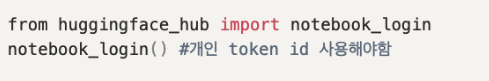

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
from datasets import load_dataset, Audio

In [ ]:
dataset = load_dataset("PolyAI/minds14",name='en-US',split="train")

In [ ]:
dataset['audio']

In [ ]:
dataset_recog = dataset.cast_column("audio",Audio(sampling_rate=speech_recognizer.feature_extractor.sampling_rate))

In [ ]:
dataset_recog

### 2. 오디오 추출

In [ ]:
result = speech_recognizer(dataset_recog[:4]['audio'])

In [ ]:
result

In [ ]:
from pprint import pprint
pprint([data["text"] for data in result])

### 3. 감성분류

In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis",model="jaehyeong/koelectra-base-v3-generalized-sentiment-analysis")

In [ ]:
results = classifier(["점심먹고싶은데 배고프다.", "아 짜증나네." , "행복해, 오늘이 마지막 수업", "공부는 어려워", "덤벼라, 이 자식아!", "우리 헤어져"])

In [ ]:
for result in results:
    print(f"label: {result['label']}, with score : {round(result['score'],4)}")

- 도메인별 차이가 존재한다.

In [ ]:
classifier(['찰리 채플린 영화, 배꼽 빠질뻔!','배보다 배꼽이 더 크네'])